# 데이터 전처리

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# path = './seoul_house_price.csv'
path = './s_h_p.csv'

df = pd.read_csv(path)

df = df[ df['Type'] == 'APT' ]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12156 entries, 1 to 17784
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                12156 non-null  object 
 1   Type                12156 non-null  object 
 2   Build               12156 non-null  int64  
 3   Dir                 12156 non-null  object 
 4   minArea             12156 non-null  float64
 5   maxArea             12156 non-null  float64
 6   representativeArea  12156 non-null  float64
 7   floorAreaRatio      12156 non-null  int64  
 8   minDeal             11687 non-null  float64
 9   maxDeal             11687 non-null  float64
 10  medianDeal          11687 non-null  float64
 11  minLease            8442 non-null   float64
 12  maxLease            8442 non-null   float64
 13  medianLease         6677 non-null   float64
 14  minDealUnit         11687 non-null  float64
 15  maxDealUnit         11687 non-null  float64
 16  medi

## Feature

In [192]:
features = ['Type', 'Dir' ,'Old', 'sector', 'divisition', 'representativeArea', 'floorAreaRatio', 'BUS', 'METRO', 'INFANT', 'PRESCHOOL', 'HOSPITAL', 'PARKING', 'MART', 'CONVENIENCE', 'BANK', 'OFFICE', 'PRI_SCHOOL', 'PUB_SCHOOL']
label = 'price'

pre_df = df[features].copy()

pre_df[label] = (df['minDeal'] + df['maxDeal']) / 2

pre_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12156 entries, 1 to 17784
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                12156 non-null  object 
 1   Dir                 12156 non-null  object 
 2   Old                 12156 non-null  int64  
 3   sector              12156 non-null  object 
 4   divisition          12156 non-null  object 
 5   representativeArea  12156 non-null  float64
 6   floorAreaRatio      12156 non-null  int64  
 7   BUS                 12156 non-null  int64  
 8   METRO               12156 non-null  int64  
 9   INFANT              12156 non-null  int64  
 10  PRESCHOOL           12156 non-null  int64  
 11  HOSPITAL            12156 non-null  int64  
 12  PARKING             12156 non-null  int64  
 13  MART                12156 non-null  int64  
 14  CONVENIENCE         12156 non-null  int64  
 15  BANK                12156 non-null  int64  
 16  OFFI

In [193]:
#floorAreaRatio - 0 : missing value

drops = ['representativeArea', 'floorAreaRatio', label]

for dr in drops:
    pre_df.loc[:,dr] = pre_df[dr].copy().apply(lambda x : None if x == 0 else x)
pre_df.dropna(inplace=True)
pre_df.reset_index(drop=True, inplace=True)
pre_df

,Type,Dir,Old,sector,divisition,representativeArea,floorAreaRatio,BUS,METRO,INFANT,PRESCHOOL,HOSPITAL,PARKING,MART,CONVENIENCE,BANK,OFFICE,PRI_SCHOOL,PUB_SCHOOL,price
0,APT,EE,2006,가락동,송파구,182.0,545.0,18,3,8,1,1,14,2,33,20,1,0,1,159000.0
1,APT,EE,2018,가락동,송파구,110.0,285.0,9,1,9,0,0,8,1,9,9,1,0,1,306750.0
2,APT,EE,2001,가락동,송파구,141.0,299.0,15,1,9,1,0,7,3,24,18,1,0,2,227500.0
3,APT,EE,1997,가락동,송파구,81.0,343.0,20,1,16,3,1,1,2,19,10,2,0,2,167500.0
4,APT,EE,2004,가락동,송파구,35.0,673.0,18,3,9,1,1,16,2,30,23,1,0,1,21750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10894,APT,SS,1994,흥인동,중구,118.0,837.0,15,2,5,1,2,48,0,40,27,12,0,1,82500.0
10895,APT,SS,2014,흥인동,중구,163.0,696.0,16,2,6,2,2,43,2,41,25,13,0,1,202500.0
10896,APT,EN,2014,흥인동,중구,163.0,696.0,16,2,6,2,2,43,2,41,25,13,0,1,202500.0
10897,APT,NN,2016,흥인동,중구,29.0,799.0,15,2,4,1,2,48,0,38,26,12,0,1,25500.0


In [194]:
#True false
def to_binominal(x):
    return x > 0

binomial_header = ['BUS', 'METRO', 'INFANT', 'PRESCHOOL', 'HOSPITAL', 'PARKING', 'MART', 'CONVENIENCE', 'BANK', 'OFFICE', 'PRI_SCHOOL', 'PUB_SCHOOL']

for head in binomial_header:
    pre_df.loc[:,head] = pre_df[head].copy().apply(to_binominal)

## Outlier

In [195]:
def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 3  # 제거 범위 조절 변수
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff


pre_df = remove_out(pre_df, [label])

pre_df.describe()

,Old,representativeArea,floorAreaRatio,price
count,10656.000000,10656.000000,10656.000000,10656.000000
mean,2004.567943,96.113739,327.601445,121468.350601
std,9.172219,37.050214,168.381237,74668.805021
min,1970.000000,15.000000,12.000000,6500.000000
25%,1999.000000,79.000000,235.000000,71250.000000
50%,2004.000000,102.000000,273.000000,105000.000000
75%,2011.000000,110.000000,356.000000,155000.000000
max,2022.000000,336.000000,1249.000000,420000.000000


## Scale

In [196]:
sns.set(rc={'figure.figsize':(30,30)})
# res = sns.heatmap(pre_df.corr().round(2), square=True, cmap='RdYlGn', annot=True, annot_kws={"size": 20})

# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)

dir_df = pre_df.groupby(by='Dir')

dir_df.describe()

Old                                                                 \
      count         mean       std     min     25%     50%     75%     max   
Dir                                                                          
EE   1758.0  2003.997156  8.965722  1970.0  1998.0  2003.0  2010.0  2022.0   
EN    420.0  2008.514286  8.685559  1982.0  2002.0  2008.0  2016.0  2022.0   
ES   2156.0  2004.334879  9.198210  1971.0  1999.0  2004.0  2011.0  2022.0   
NN    295.0  2007.522034  8.936588  1983.0  2001.0  2006.0  2015.0  2022.0   
SS   3068.0  2003.646675  8.969153  1971.0  1998.0  2003.0  2009.0  2022.0   
WN    349.0  2007.409742  9.681183  1972.0  2001.0  2007.0  2016.0  2022.0   
WS   1787.0  2004.742026  9.324740  1972.0  1999.0  2004.0  2012.0  2022.0   
WW    823.0  2005.176185  9.063540  1970.0  1999.0  2004.0  2013.0  2022.0   

    representativeArea              ... floorAreaRatio           price  \
                 count        mean  ...            75%     max   count   
Dir                                 ...                                  
EE              1758.0   94.746871  ...         354.75  1106.0  1758.0   
EN               420.0   83.930952  ...         534.50  1249.0   420.0   
ES              2156.0   97.721707  ...         334.00  1084.0  2156.0   
NN               295.0   76.650847  ...         564.00  1102.0   295.0   
SS              3068.0  100.165254  ...         333.00  1102.0  3068.0   
WN               349.0   91.303725  ...         513.00  1249.0   349.0   
WS              1787.0   98.019026  ...         341.00  1249.0  1787.0   
WW               823.0   90.814095  ...         397.00  1249.0   823.0   

                                                                        \
              mean           std      min      25%       50%       75%   
Dir                                                                      
EE   116954.274744  70573.866651   8700.0  71312.5  101500.0  149000.0   
EN   109231.404762  82797.401217   6500.0  43687.5   92375.0  151750.0   
ES   125101.083024  71714.901016   8700.0  77500.0  111500.0  156500.0   
NN   100788.016949  89016.400802   9350.0  33000.0   70800.0  141250.0   
SS   124450.563559  75362.781629   8700.0  74375.0  105500.0  157500.0   
WN   121464.169054  85850.837468  10250.0  52500.0  107000.0  166500.0   
WS   126131.306659  71275.846574   8700.0  78500.0  113500.0  157500.0   
WW   114011.628190  77579.597704   8000.0  63250.0   95000.0  146250.0   

               
          max  
Dir            
EE   420000.0  
EN   415000.0  
ES   420000.0  
NN   415000.0  
SS   420000.0  
WN   415000.0  
WS   420000.0  
WW   415000.0  

[8 rows x 32 columns]

## 방향에 따른 가격

/var/folders/y8/ldvzwhm13037mvvt3p2d9n0m0000gn/T/ipykernel_76884/2072173632.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


[Text(0, 85000.0, '8.50억'),
 Text(0, 90000.0, '9.00억'),
 Text(0, 95000.0, '9.50억'),
 Text(0, 100000.0, '10.00억'),
 Text(0, 105000.0, '10.50억'),
 Text(0, 110000.0, '11.00억'),
 Text(0, 115000.0, '11.50억'),
 Text(0, 120000.0, '12.00억'),
 Text(0, 125000.0, '12.50억'),
 Text(0, 130000.0, '13.00억'),
 Text(0, 135000.0, '13.50억')]

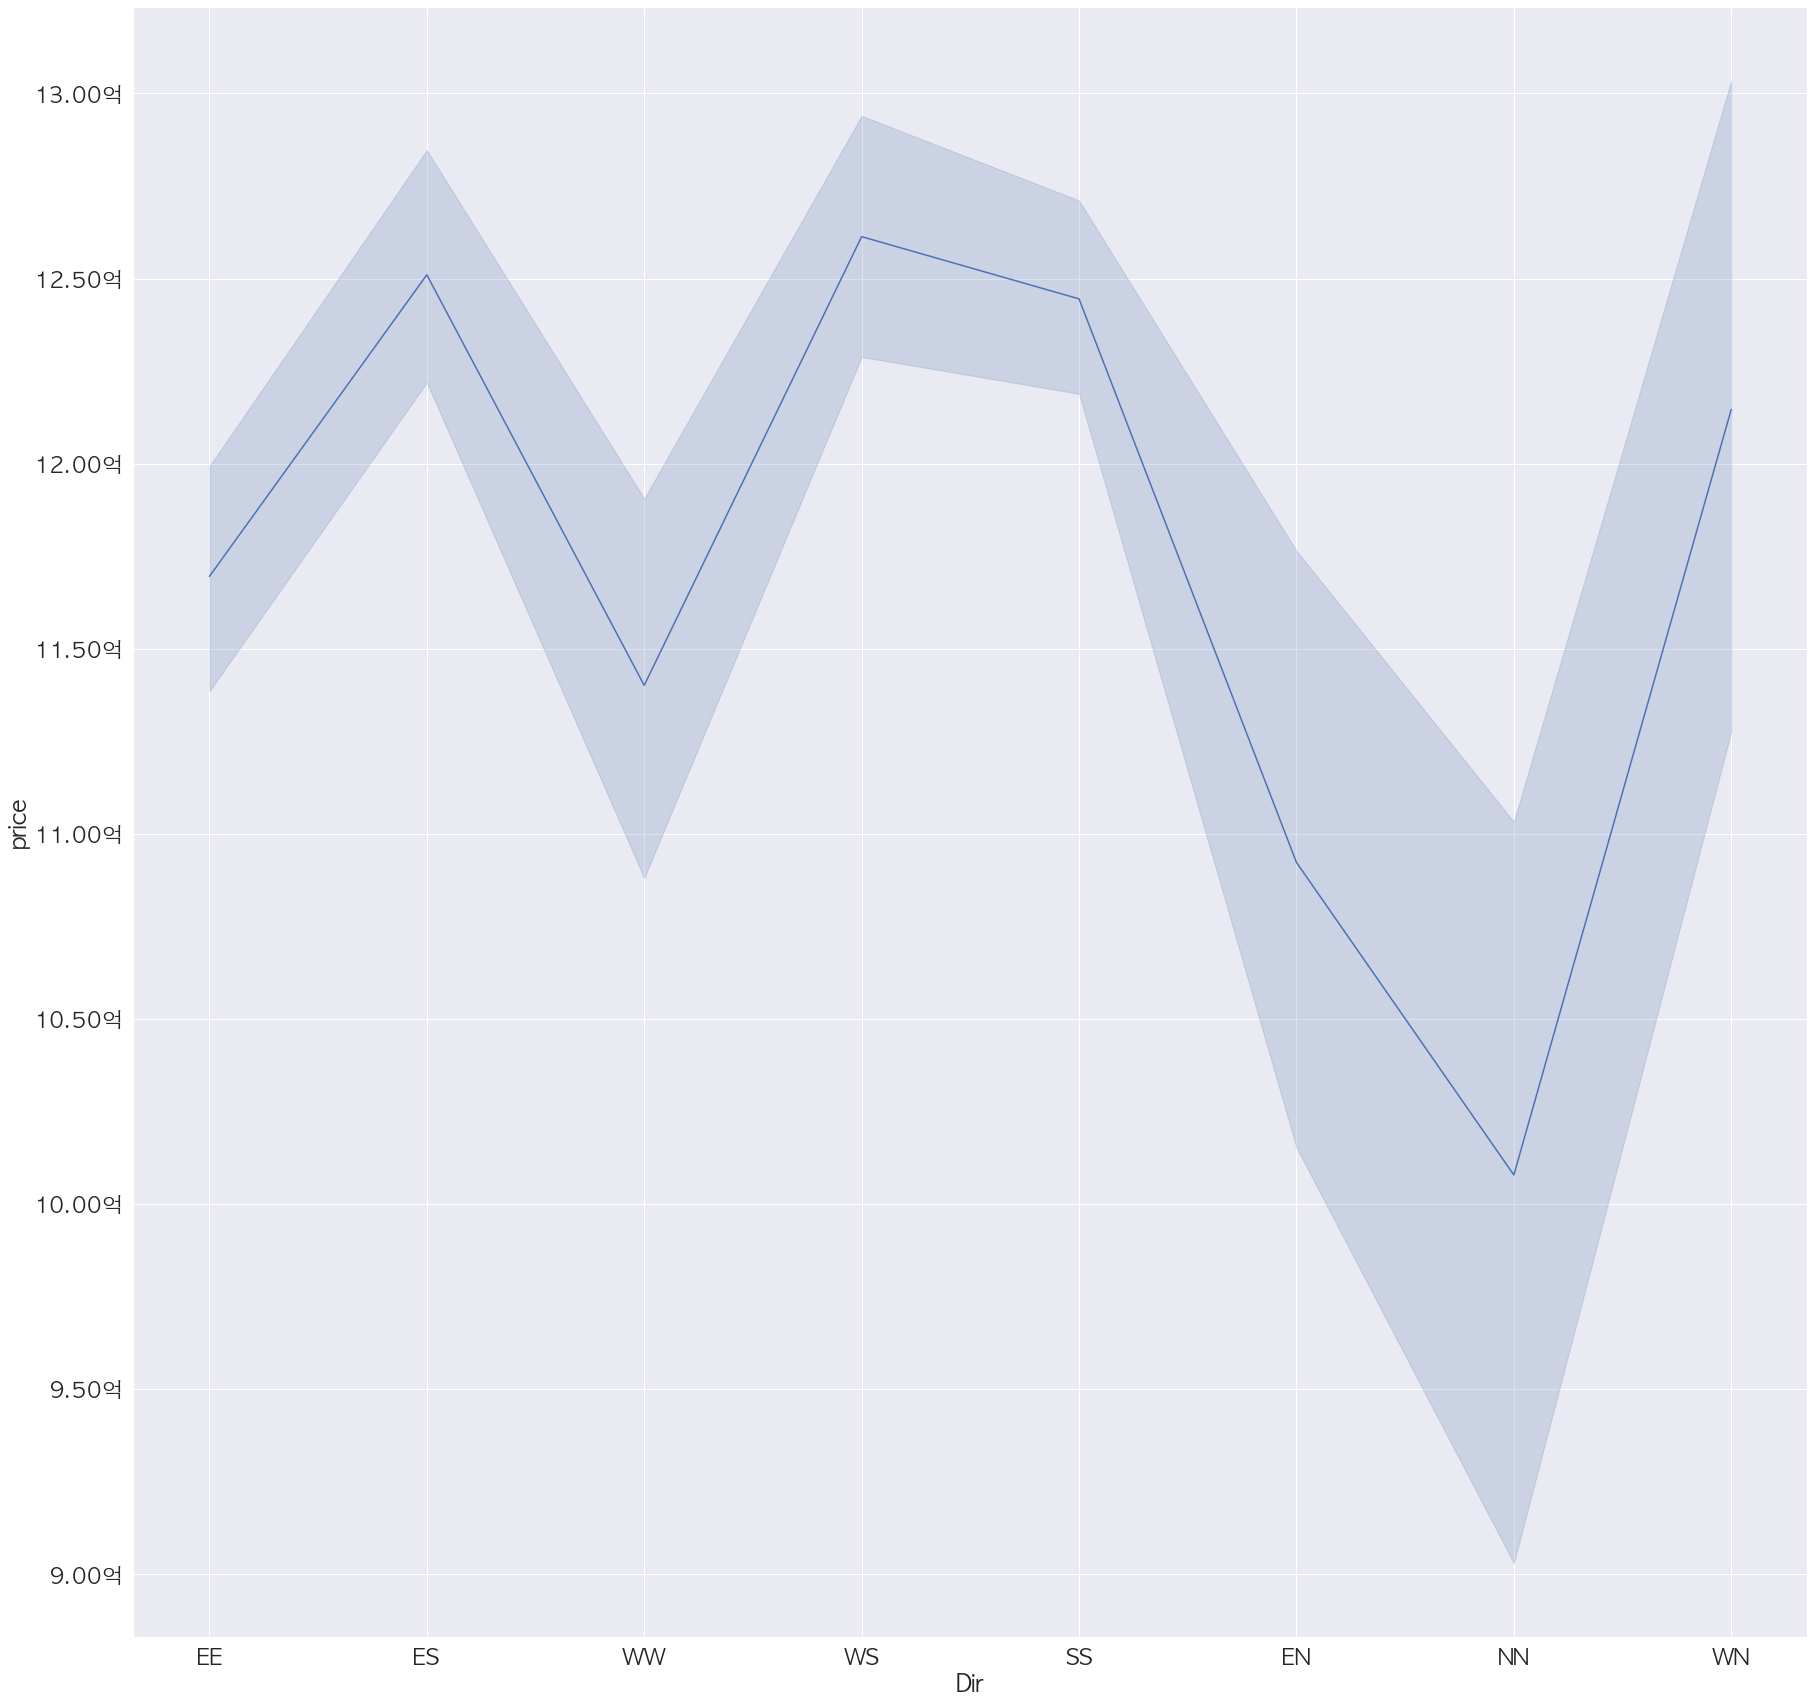

In [197]:
sns.set(font_scale = 2) 
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.lineplot(x='Dir', y = label, data=pre_df)
ylabels = ['{:.2f}'.format(x) + '억' for x in ax.get_yticks() / 10000]
#remove '구'
# xlabels = [x for x in ax.get_xticks()]
# ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

## 구에 따른 가격

/var/folders/y8/ldvzwhm13037mvvt3p2d9n0m0000gn/T/ipykernel_76884/881668789.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


[Text(0, 40000.0, '4억'),
 Text(0, 60000.0, '6억'),
 Text(0, 80000.0, '8억'),
 Text(0, 100000.0, '10억'),
 Text(0, 120000.0, '12억'),
 Text(0, 140000.0, '14억'),
 Text(0, 160000.0, '16억'),
 Text(0, 180000.0, '18억'),
 Text(0, 200000.0, '20억'),
 Text(0, 220000.0, '22억'),
 Text(0, 240000.0, '24억')]

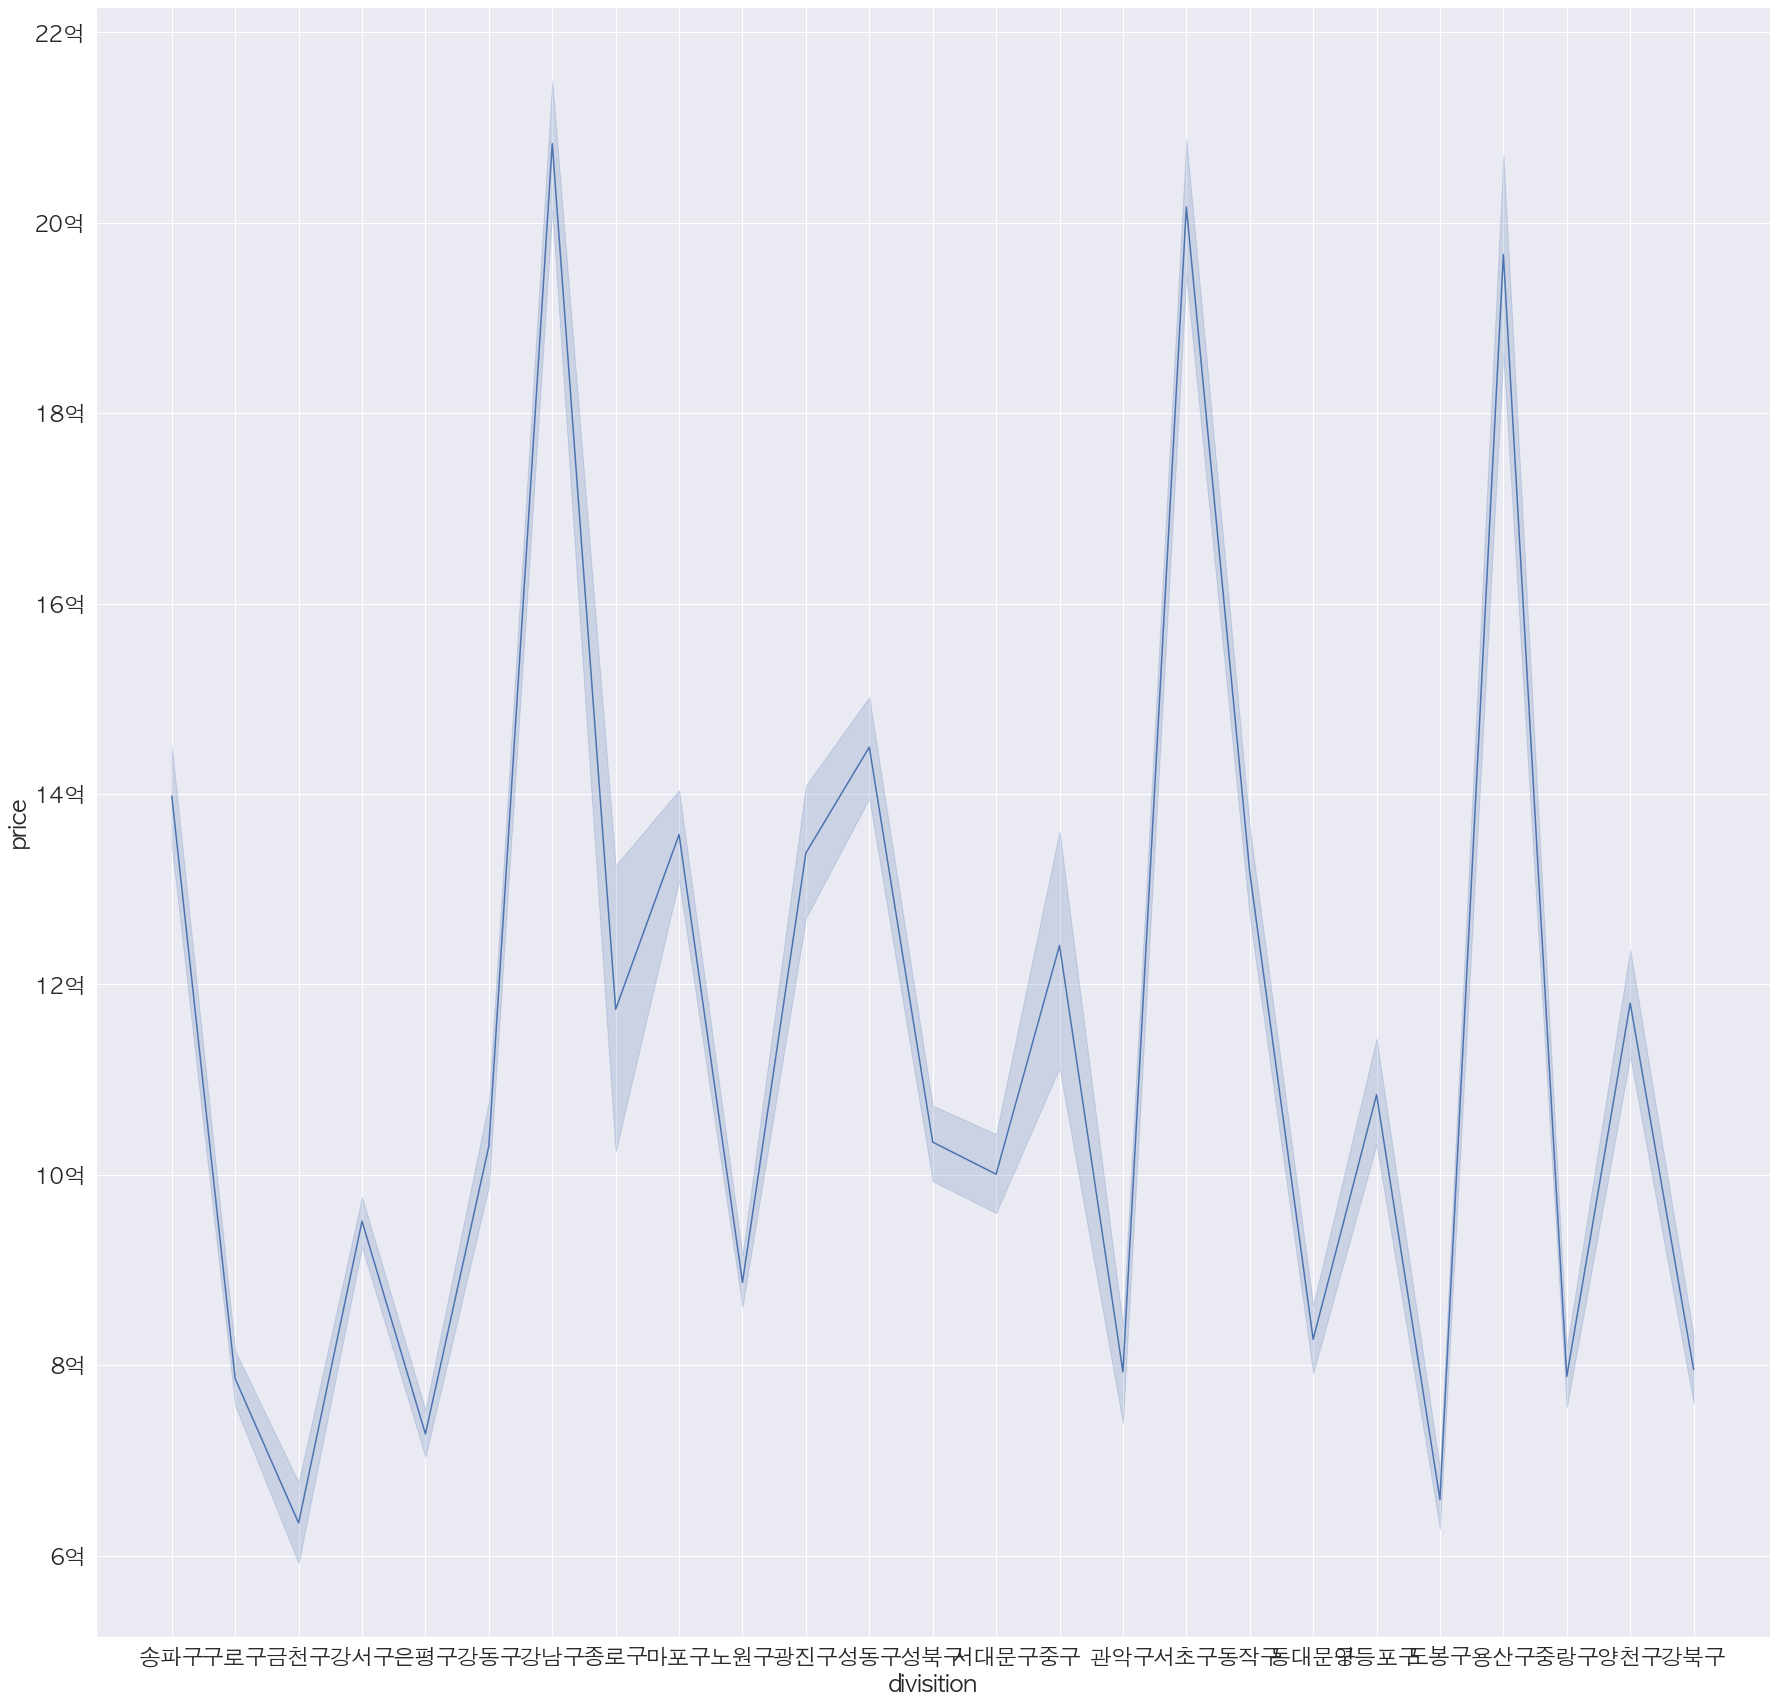

In [198]:
sns.set(font_scale = 2) 
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.lineplot(x='divisition', y = label, data=pre_df)
ylabels = ['{:.0f}'.format(x) + '억' for x in ax.get_yticks() / 10000]
ax.set_yticklabels(ylabels)

## 역세권

/var/folders/y8/ldvzwhm13037mvvt3p2d9n0m0000gn/T/ipykernel_76884/3169877294.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


[Text(0, -100000.0, '-10억'),
 Text(0, 0.0, '0억'),
 Text(0, 100000.0, '10억'),
 Text(0, 200000.0, '20억'),
 Text(0, 300000.0, '30억'),
 Text(0, 400000.0, '40억'),
 Text(0, 500000.0, '50억')]

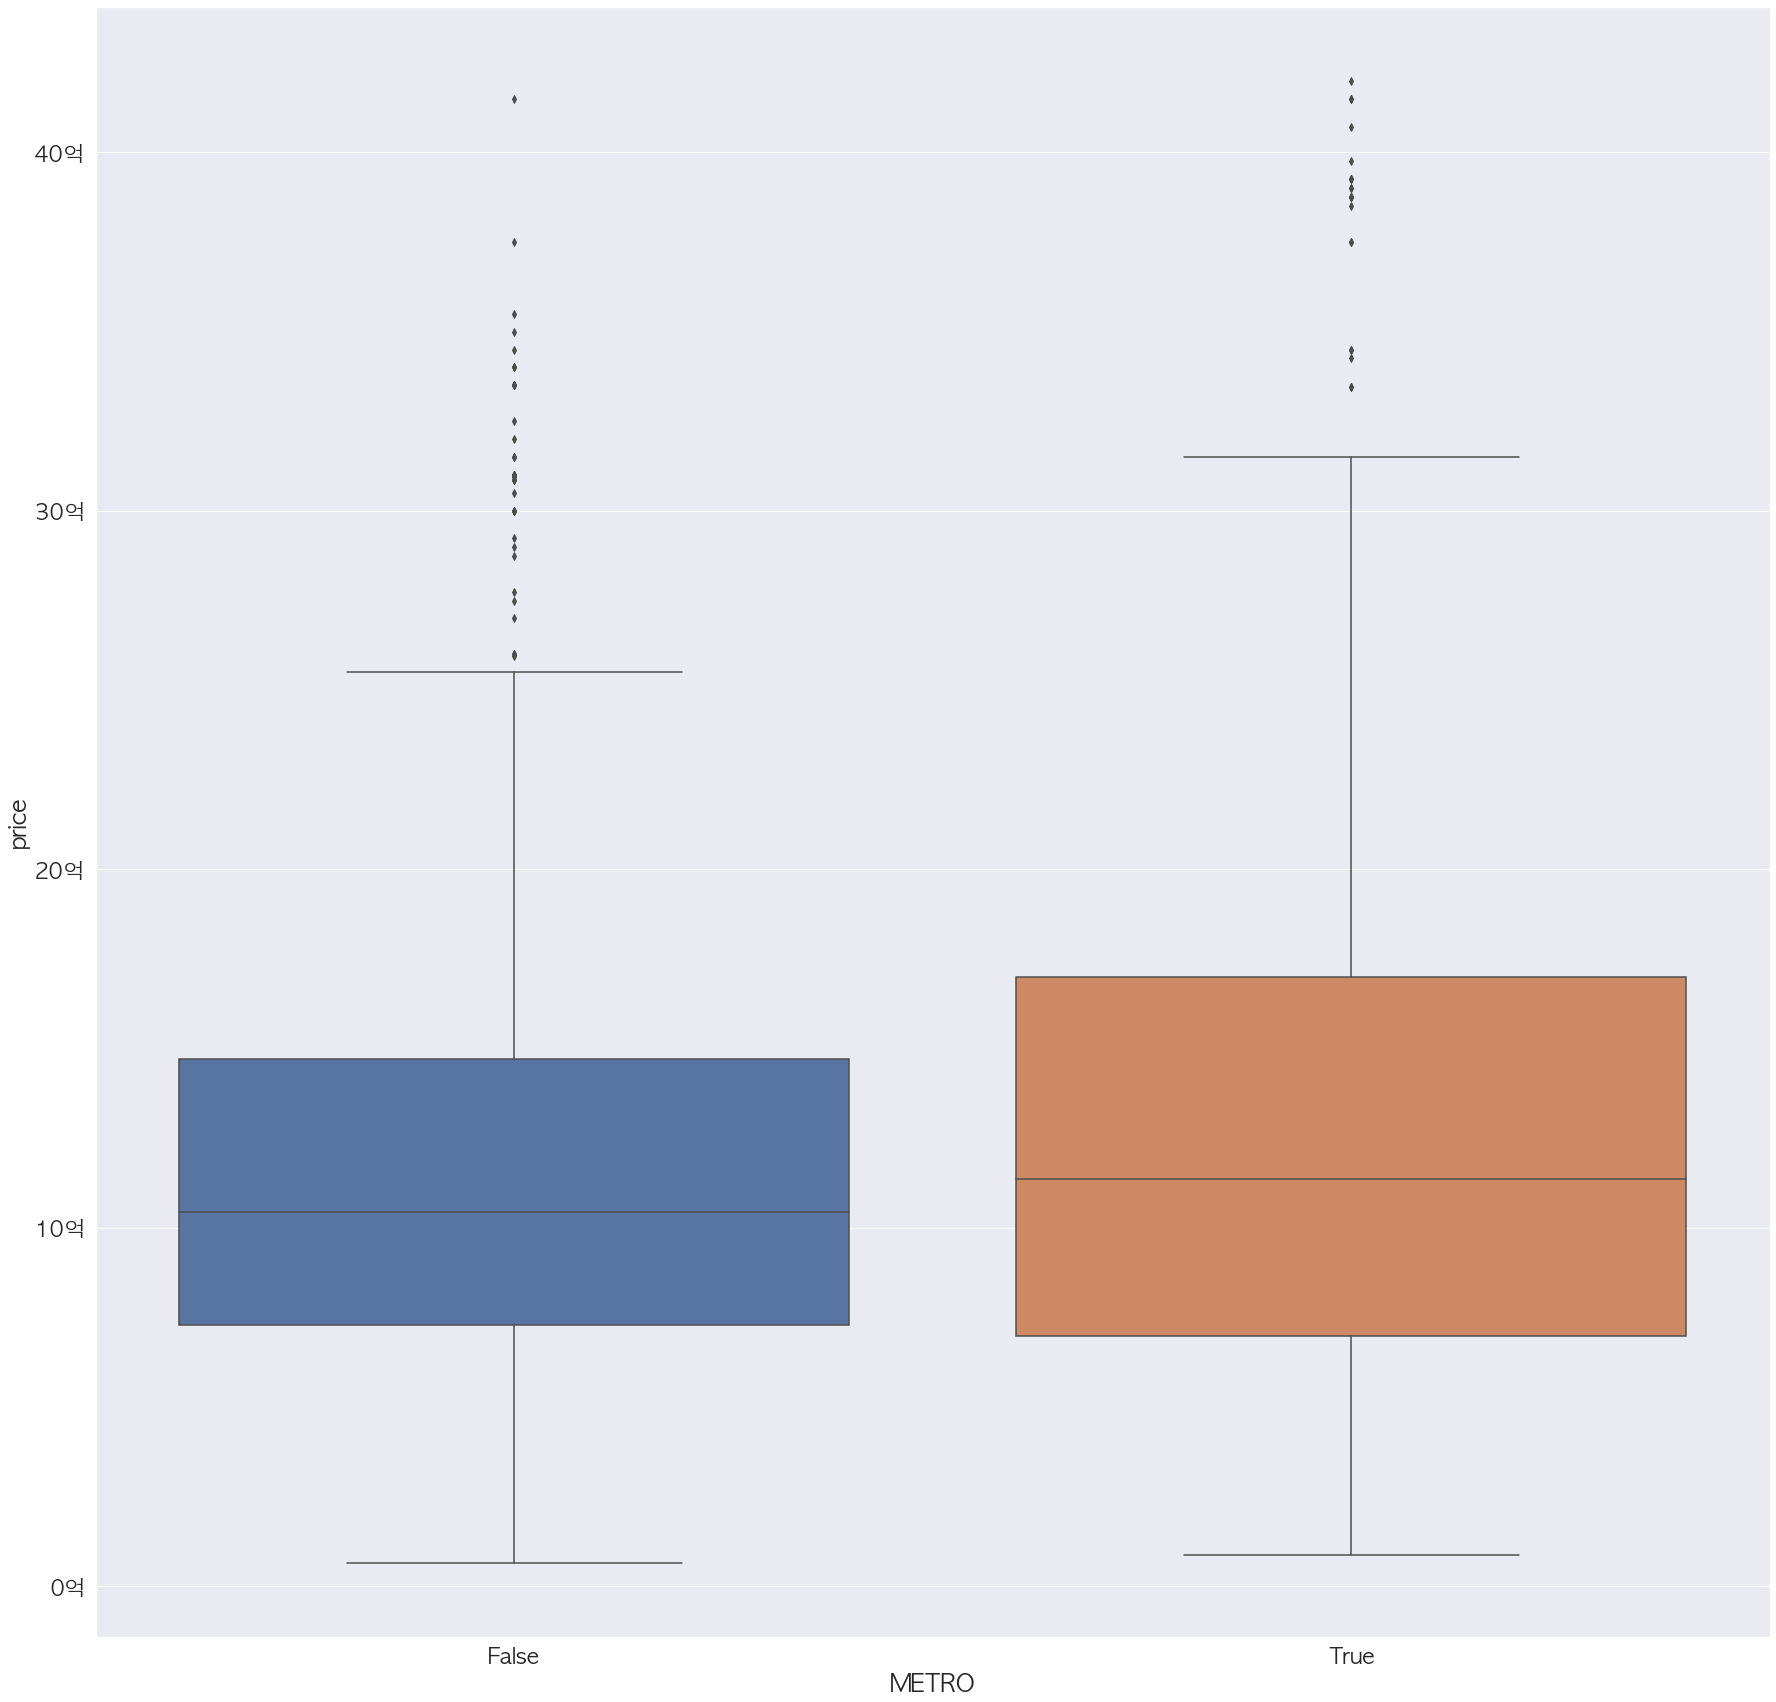

In [199]:
sns.set(font_scale = 2) 
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.boxplot(x='METRO', y = label, data=pre_df.sample(1000))
ylabels = ['{:.0f}'.format(x) + '억' for x in ax.get_yticks() / 10000]
ax.set_yticklabels(ylabels)

## 연식에 따른 차이

/var/folders/y8/ldvzwhm13037mvvt3p2d9n0m0000gn/T/ipykernel_76884/1776368074.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


[Text(0, 0, '72'),
 Text(1, 0, '73'),
 Text(2, 0, '76'),
 Text(3, 0, '81'),
 Text(4, 0, '82'),
 Text(5, 0, '83'),
 Text(6, 0, '84'),
 Text(7, 0, '85'),
 Text(8, 0, '86'),
 Text(9, 0, '87'),
 Text(10, 0, '88'),
 Text(11, 0, '89'),
 Text(12, 0, '90'),
 Text(13, 0, '91'),
 Text(14, 0, '92'),
 Text(15, 0, '93'),
 Text(16, 0, '94'),
 Text(17, 0, '95'),
 Text(18, 0, '96'),
 Text(19, 0, '97'),
 Text(20, 0, '98'),
 Text(21, 0, '99'),
 Text(22, 0, '00'),
 Text(23, 0, '01'),
 Text(24, 0, '02'),
 Text(25, 0, '03'),
 Text(26, 0, '04'),
 Text(27, 0, '05'),
 Text(28, 0, '06'),
 Text(29, 0, '07'),
 Text(30, 0, '08'),
 Text(31, 0, '09'),
 Text(32, 0, '10'),
 Text(33, 0, '11'),
 Text(34, 0, '12'),
 Text(35, 0, '13'),
 Text(36, 0, '14'),
 Text(37, 0, '15'),
 Text(38, 0, '16'),
 Text(39, 0, '17'),
 Text(40, 0, '18'),
 Text(41, 0, '19'),
 Text(42, 0, '20'),
 Text(43, 0, '21'),
 Text(44, 0, '22')]

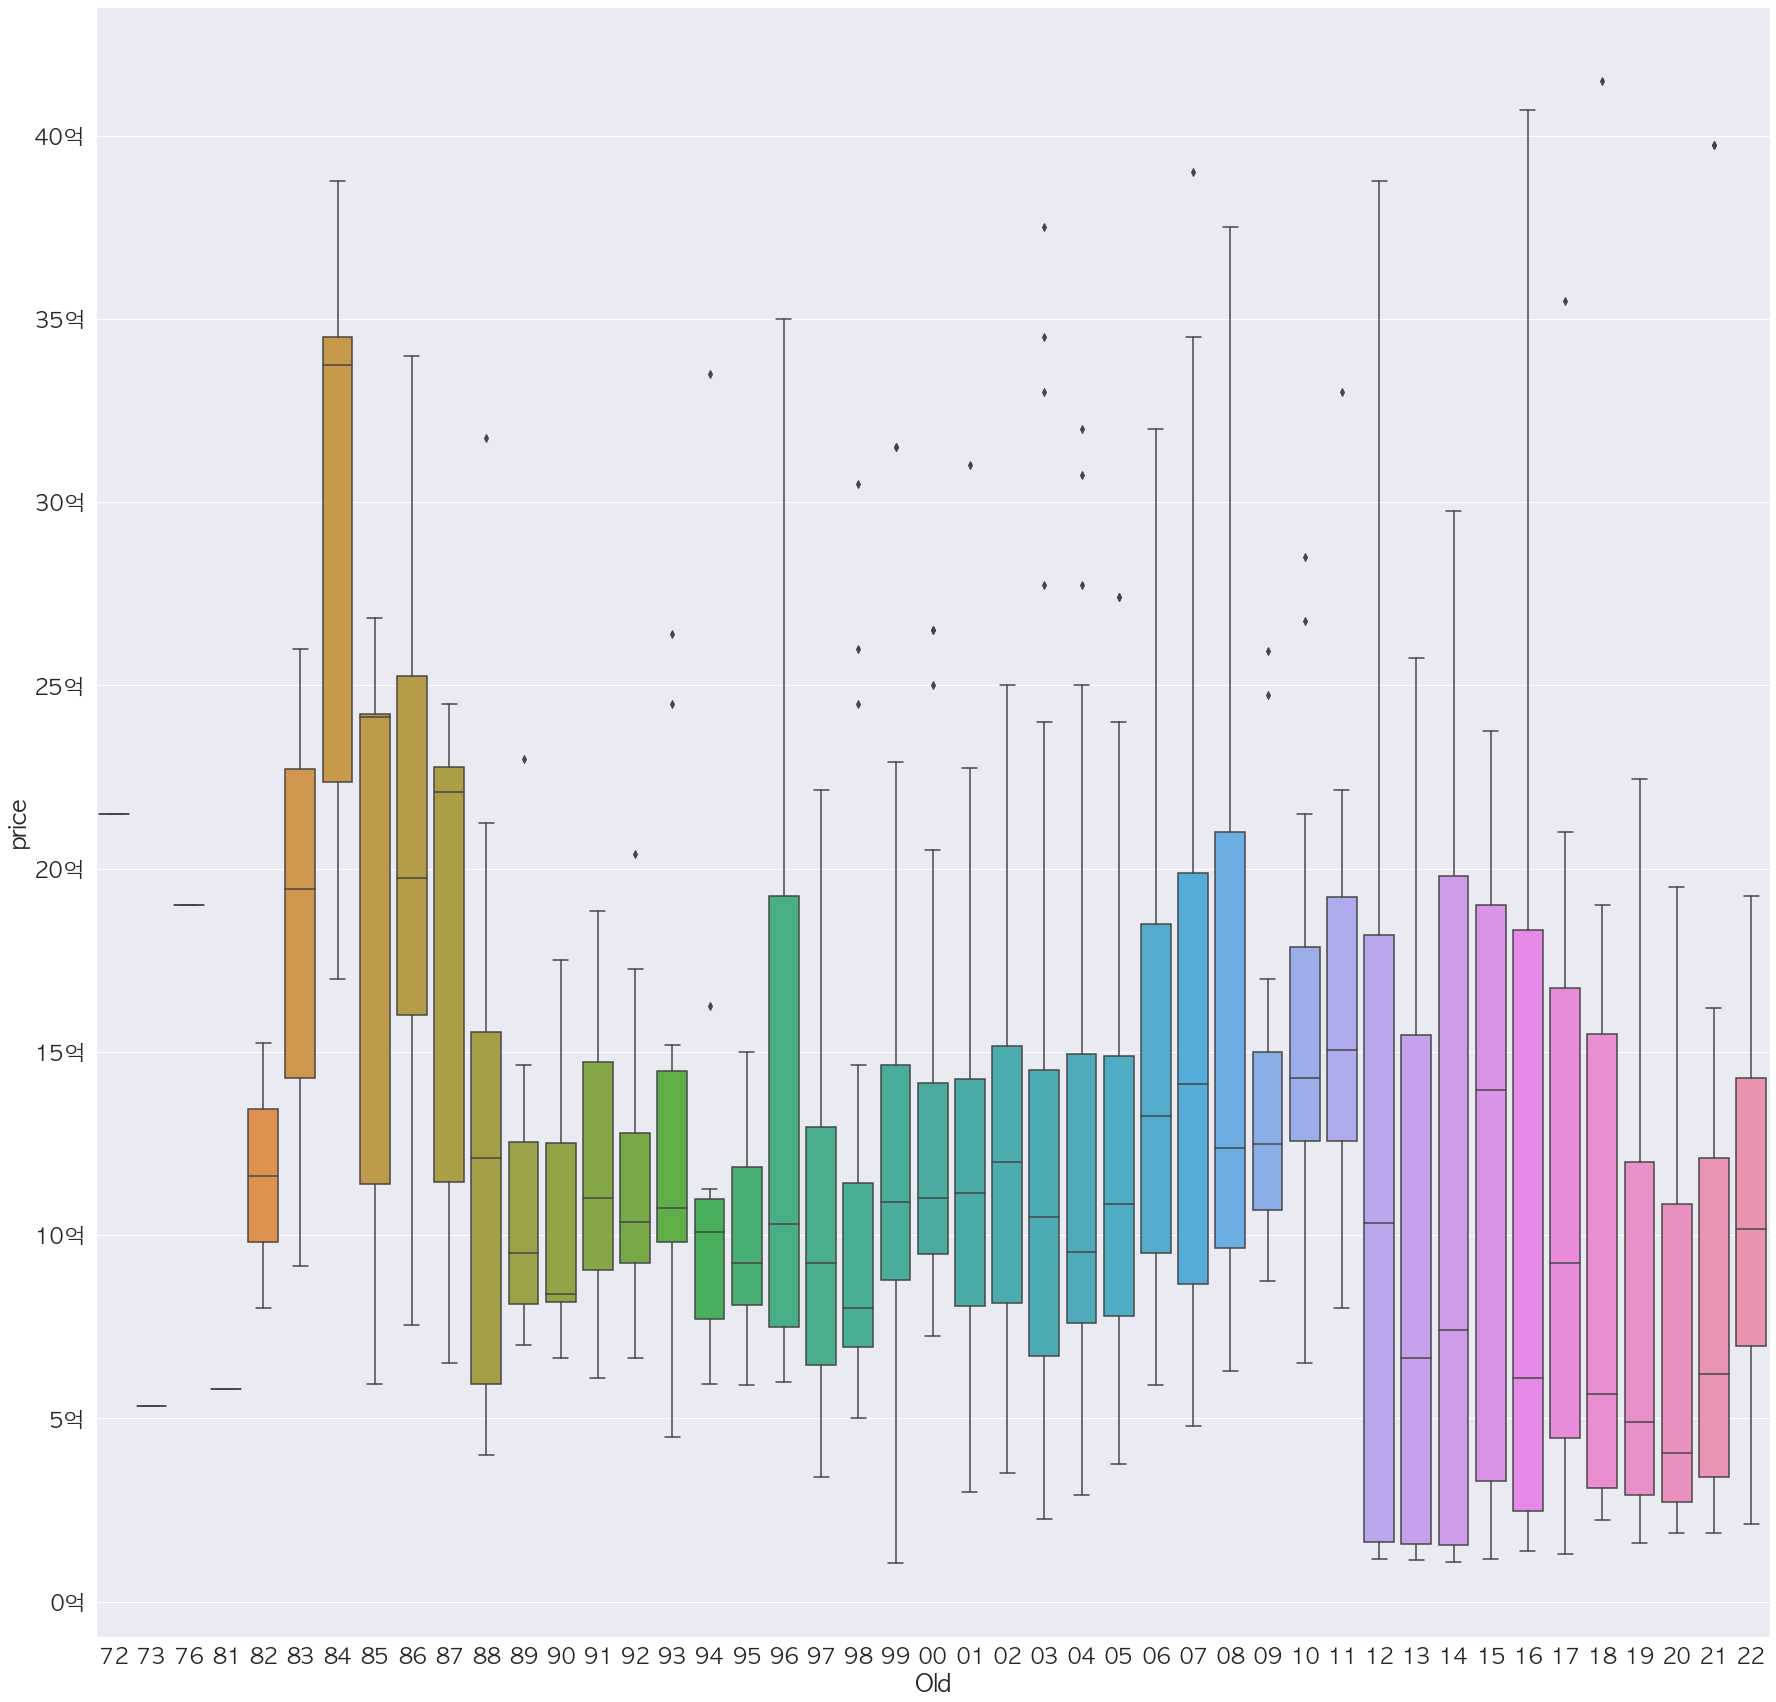

In [200]:
sns.set(font_scale = 2) 
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.boxplot(x='Old', y = label, data=pre_df.sample(1000))
ylabels = ['{:.0f}'.format(x) + '억' for x in ax.get_yticks() / 10000]
xlabels = [x._text[2:] for x in ax.get_xticklabels()]
ax.set_yticklabels(ylabels)
ax.set_xticklabels(xlabels)

## Label Encoding

In [201]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):                                     #It convert the catorigcal and string data into numerical values to 
    encoders = {}
    i = 0
    for c in df.columns:      #interperate easily.
        encoders[i] = None
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
            encoders[i] = lbl
        i += 1
    return df, encoders

label_df = pre_df[label]

feature_df, encoders = labelencoder(pre_df[features].copy())

feature_df.isnull().sum()

Type                  0
Dir                   0
Old                   0
sector                0
divisition            0
representativeArea    0
floorAreaRatio        0
BUS                   0
METRO                 0
INFANT                0
PRESCHOOL             0
HOSPITAL              0
PARKING               0
MART                  0
CONVENIENCE           0
BANK                  0
OFFICE                0
PRI_SCHOOL            0
PUB_SCHOOL            0
dtype: int64

## Training

In [202]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2)

feature_df

,Type,Dir,Old,sector,divisition,representativeArea,floorAreaRatio,BUS,METRO,INFANT,PRESCHOOL,HOSPITAL,PARKING,MART,CONVENIENCE,BANK,OFFICE,PRI_SCHOOL,PUB_SCHOOL
0,0,0,2006,0,17,182.0,545.0,True,True,True,True,True,True,True,True,True,True,False,True
1,0,0,2018,0,17,110.0,285.0,True,True,True,False,False,True,True,True,True,True,False,True
2,0,0,2001,0,17,141.0,299.0,True,True,True,True,False,True,True,True,True,True,False,True
3,0,0,1997,0,17,81.0,343.0,True,True,True,True,True,True,True,True,True,True,False,True
4,0,0,2004,0,17,35.0,673.0,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,0,4,1994,282,23,118.0,837.0,True,True,True,True,True,True,False,True,True,True,False,True
10652,0,4,2014,282,23,163.0,696.0,True,True,True,True,True,True,True,True,True,True,False,True
10653,0,1,2014,282,23,163.0,696.0,True,True,True,True,True,True,True,True,True,True,False,True
10654,0,3,2016,282,23,29.0,799.0,True,True,True,True,True,True,False,True,True,True,False,True


In [203]:
# creating a object
LR_Model = LinearRegression()
LR_Model.fit(x_train, y_train)
pred = LR_Model.predict(x_test)

In [204]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 39601.40189581998
MSE: 3014515876.6505446
RMSE: 54904.60706216323


In [205]:
def encode(value, encoder, delta = 0):
    for i in range(len(value)):
        if i + delta < 0 : continue
        
        if encoder[i + delta] != None:
            value[i] = encoder[i + delta].transform([value[i]])[0]
    return value

In [206]:
value = encode(['OPST', 'WS', 2022, '대치동', '강남구', 103, 237, True, False, True, True, False, True, True, True, True, True, True, True], encoders)

LR_Model.predict([value])

ValueError: y contains previously unseen labels: 'OPST'

<AxesSubplot:>

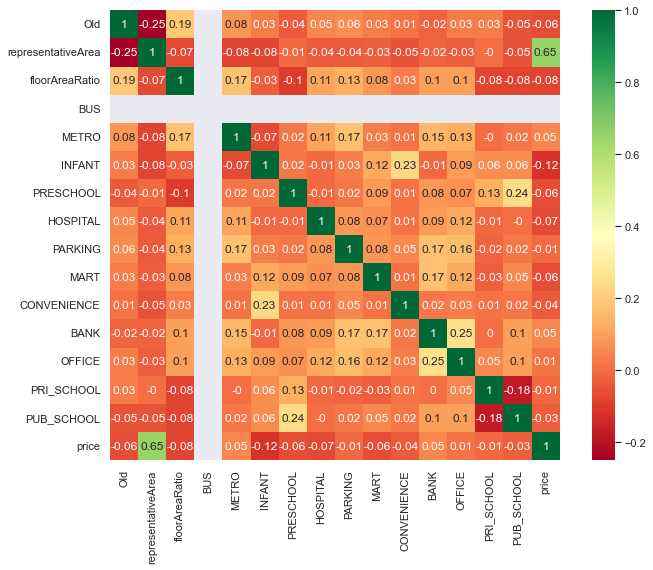

In [208]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(pre_df.corr().round(2), square=True, cmap='RdYlGn', annot=True)

In [210]:
value = encode(['APT', 'WS', 2000, '대치동', '강남구', 120, 100, False, False, False, False, False, False, False, False, False, False, False, False], encoders)
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
#트리가 10개일때, 20일때, 30일때, 40일때

model = RandomForestRegressor(n_estimators = 30, random_state = 15)
model.fit(x_train, y_train)
for item in enumerate(feature_df.columns):
    print(item[1], "%.4f" % (model.feature_importances_[item[0]]))
pred = model.predict(x_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('value ', model.predict([value]))
# for i in (10, 20, 30, 40):
#     model = RandomForestRegressor(n_estimators = i, random_state = 15)
#     model.fit(x_train, y_train)
    
#     print(model.feature_importances_)
#     pred = model.predict(x_test)
#     print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
# #     print('value ', model.predict([value]))

Type 0.0000
Dir 0.0021
Old 0.0966
sector 0.0536
divisition 0.2484
representativeArea 0.4827
floorAreaRatio 0.0707
BUS 0.0000
METRO 0.0084
INFANT 0.0011
PRESCHOOL 0.0040
HOSPITAL 0.0075
PARKING 0.0016
MART 0.0043
CONVENIENCE 0.0000
BANK 0.0016
OFFICE 0.0034
PRI_SCHOOL 0.0044
PUB_SCHOOL 0.0095
RMSE: 15965.18461271855
value  [214316.66666667]
